In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams

%matplotlib inline

### Data Exploration

In [69]:
data = pd.read_csv('googleplaystore.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [70]:
data.shape
data.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [71]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
#print(total)
#print(percent)
pd.concat([total, percent])
missing_data = pd.concat([total, percent], axis =1, keys= ['Total','Percent'])
missing_data.head(6)

,Total,Percent
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,3,0.000277
Content Rating,1,0.000092
Type,1,0.000092
Last Updated,0,0.000000


In [72]:
data.dropna(how = 'any',inplace = True)

In [73]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
pd.concat([total,percent])
pd.concat([total,percent], keys = ['total','percent'])
missing_data = pd.concat([total,percent], axis = 1, keys = ['total','percent'])
missing_data.head(6)

,total,percent
Android Ver,0,0.0
Current Ver,0,0.0
Last Updated,0,0.0
Genres,0,0.0
Content Rating,0,0.0
Price,0,0.0


In [74]:
print(data.shape)

(9360, 13)


### Rating

In [75]:
data.dtypes
data['Rating'].describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Distribution of Rating')

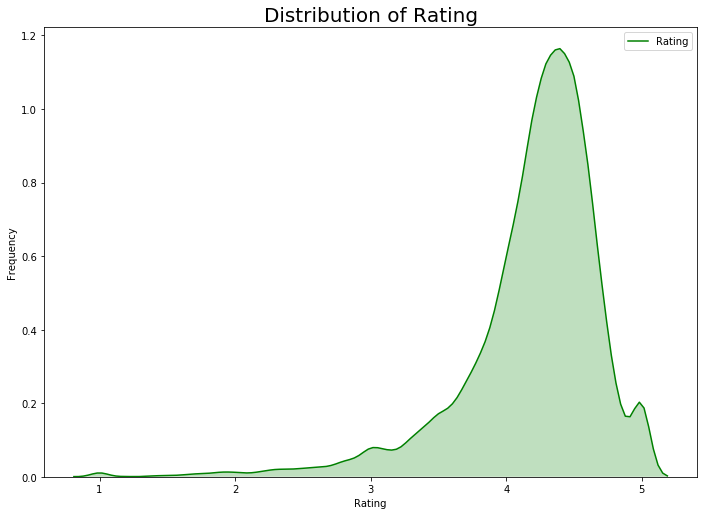

In [76]:
#rating distribution
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(data.Rating, color = 'Green', shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating', size = 20)

### Category

In [77]:
print("Jumlah Kategori", len(data['Category'].unique()))
print("\n", data['Category'].unique())

Jumlah Kategori 33

 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


Text(0.5, 1.0, 'Count of app in each category')

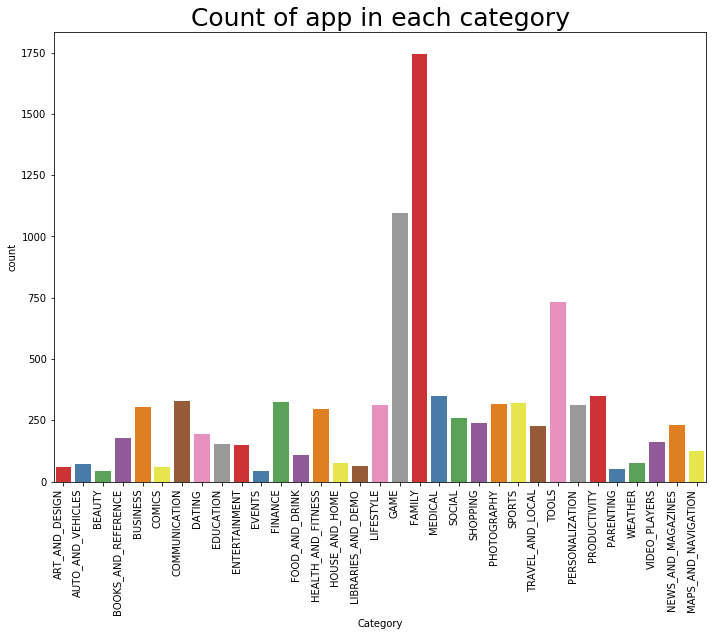

In [78]:
g = sns.countplot(x="Category", data = data, palette = 'Set1')
g.set_xticklabels(g.get_xticklabels(), rotation = 90, ha ="right")
g
plt.title('Count of app in each category', size = 25)

Text(0.5, 1, 'Boxplot of Rating VS Category')

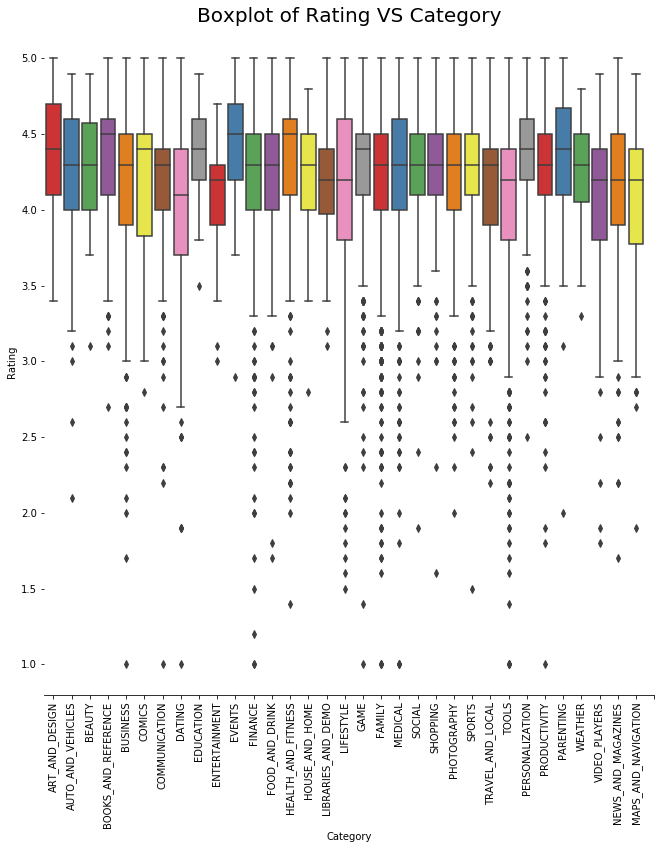

In [80]:
g = sns.catplot(x="Category", y="Rating",data = data, kind = 'box', height = 10, palette = "Set1")
g.despine(left = True)
g.set_xticklabels(rotation=90)
g.set(xticks = range(0,34))
g = g.set_ylabels("Rating")
plt.title('Boxplot of Rating VS Category', size = 20)


In [81]:
app_kategori = data[data.Category=='COMMUNICATION']
app_kategori 
top_rating = app_kategori.sort_values('Installs',ascending=False)
top_rating.loc[:,['App','Installs']].head(10)


,App,Installs
4122,LINE: Free Calls & Messages,"500,000,000+"
347,imo free video calls and chat,"500,000,000+"
403,LINE: Free Calls & Messages,"500,000,000+"
378,UC Browser - Fast Download Private & Secure,"500,000,000+"
420,UC Browser - Fast Download Private & Secure,"500,000,000+"
371,Google Duo - High Quality Video Calls,"500,000,000+"
431,Viber Messenger,"500,000,000+"
4676,Viber Messenger,"500,000,000+"
385,Viber Messenger,"500,000,000+"
465,imo free video calls and chat,"500,000,000+"


Text(0.5, 1, 'Boxplot of Rating VS Category, size = 20')

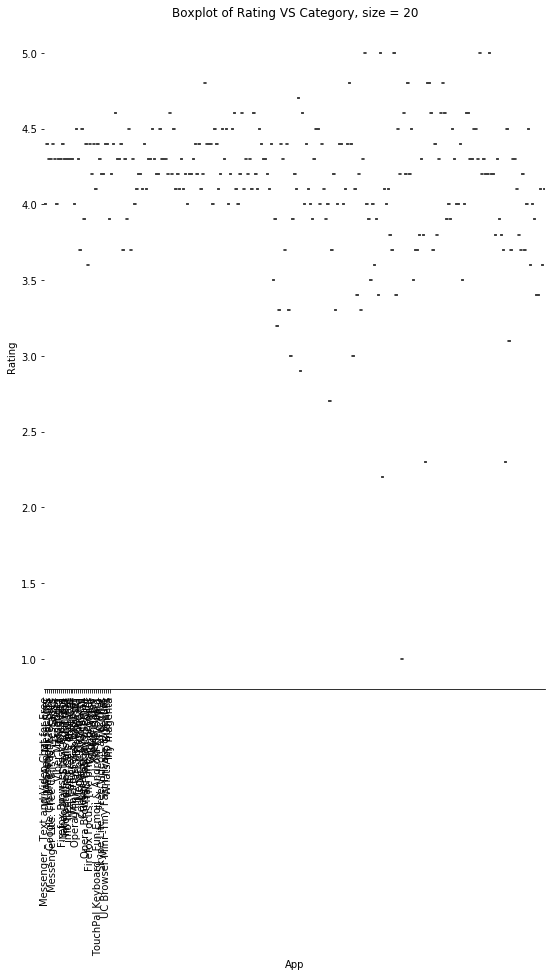

In [83]:
g = sns.catplot(x='App', y ='Rating', data = app_kategori, kind = "box", height = 10, palette = "Set1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set(xticks = range(0,34))
g = g.set_ylabels("Rating")
plt.title('Boxplot of Rating VS Category, size = 20')

## REVIEWS

In [89]:
data['Reviews'].head(10).sort_values(ascending=True)

9       121
8     13791
0       159
5       167
6       178
3    215644
7     36815
2     87510
1       967
4       967
Name: Reviews, dtype: object

In [91]:
data['Reviews'] = data['Reviews'].apply(lambda x: int(x))

Text(0.5, 1.0, 'Distribution of Review')

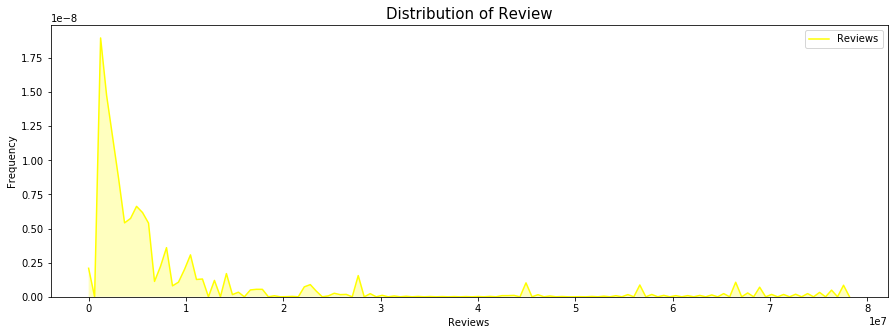

In [93]:
rcParams['figure.figsize'] = 15 , 5
g = sns.kdeplot(data.Reviews, color = 'Yellow', shade = True)
g.set_xlabel("Reviews")
g.set_ylabel("Frequency")
plt.title('Distribution of Review', size = 15)

In [94]:
data[data.Reviews > 5000000].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,Varies with device,"500,000,000+",Free,0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
351,Opera Mini - fast web browser,COMMUNICATION,4.5,5149854,Varies with device,"100,000,000+",Free,0,Everyone,Communication,"July 19, 2018",Varies with device,Varies with device


<Figure size 720x720 with 0 Axes>

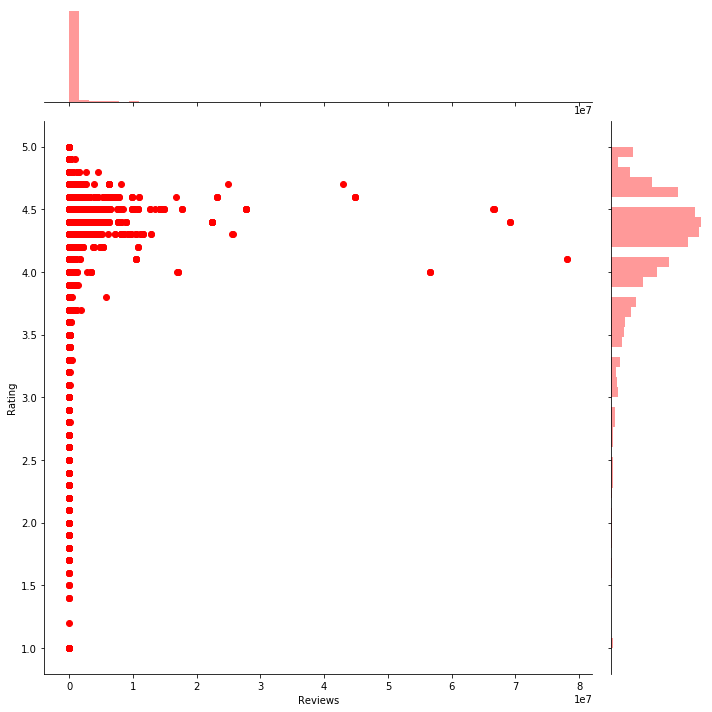

In [96]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x = "Reviews", y = "Rating", color = 'red', data = data, size = 10);

Text(0.5, 1.0, 'Rating VS Reviews')

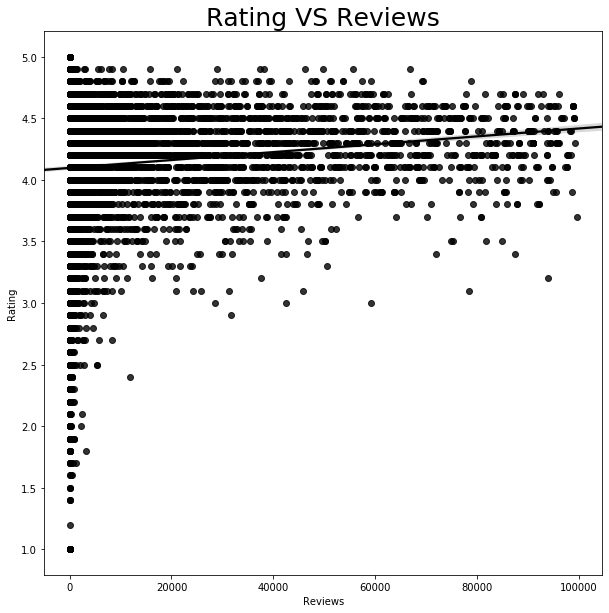

In [101]:
plt.figure(figsize = (10,10))
sns.regplot(x="Reviews", y = "Rating", color = 'black', data = data[data['Reviews']<100000]);
plt.title('Rating VS Reviews', size = 25)

### SIZE

In [102]:
data['Size'].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [103]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [104]:
len(data[data.Size == 'Varies with device'])

1637

In [108]:
data['Size'].replace('Varies with device', np.nan, inplace = True)
data['Size'].fillna(data.groupby('Category')['Size'].transform('mean'),inplace = True)

In [107]:
data.Size = (data.Size.replace(r'[kM]+$','',regex = True).astype(float)
* \
            data.Size.str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))

<Figure size 720x720 with 0 Axes>

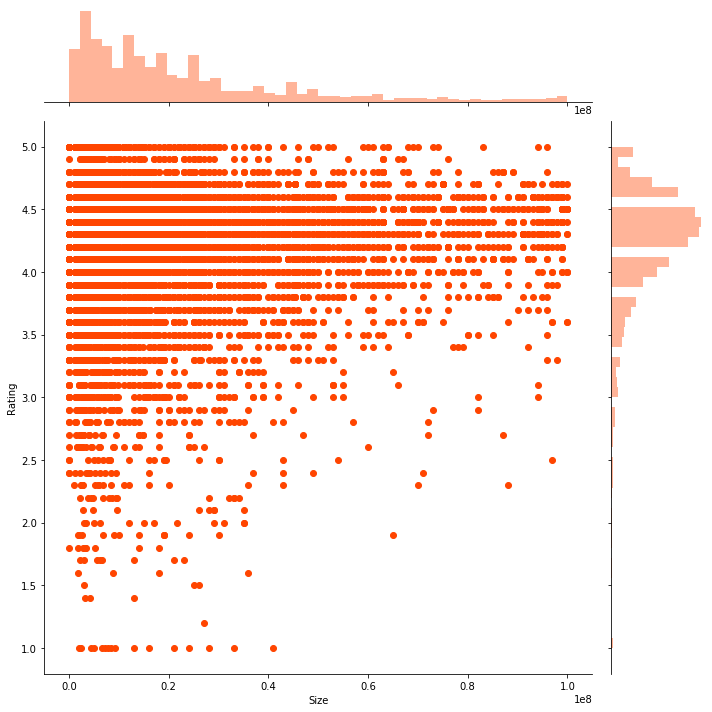

In [111]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Size", y = "Rating", color = 'orangered', data = data, size =10);

## INSTALL

In [112]:
data['Installs'].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [113]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [114]:
data.Installs = data.Installs.apply(lambda x: x.replace(',',''))
data.Installs = data.Installs.apply(lambda x: x.replace('+',''))
data.Installs = data.Installs.apply(lambda x: int(x))

In [115]:
data['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1], dtype=int64)

In [117]:
Sorted_value = sorted(list(data['Installs'].unique()))
Sorted_value

[1,
 5,
 10,
 50,
 100,
 500,
 1000,
 5000,
 10000,
 50000,
 100000,
 500000,
 1000000,
 5000000,
 10000000,
 50000000,
 100000000,
 500000000,
 1000000000]

In [118]:
data[data.Installs > 1000000].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
12,Tattoo Name On My Photo Editor,ART_AND_DESIGN,4.2,44829,20000000.0,10000000,Free,0,Teen,Art & Design,"April 2, 2018",3.8,4.1 and up
18,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,39000000.0,5000000,Free,0,Everyone,Art & Design,"August 3, 2018",2.2.5,4.0.3 and up
19,ibis Paint X,ART_AND_DESIGN,4.6,224399,31000000.0,10000000,Free,0,Everyone,Art & Design,"July 30, 2018",5.5.4,4.1 and up


In [119]:
app_kategori = data[data.Category=='COMMUNICATION']
app_kategori 
top_rating = app_kategori.sort_values('Reviews',ascending=False)
top_rating.loc[:,['App','Reviews']].head(20)


,App,Reviews
381,WhatsApp Messenger,69119316
336,WhatsApp Messenger,69119316
3904,WhatsApp Messenger,69109672
382,Messenger – Text and Video Chat for Free,56646578
335,Messenger – Text and Video Chat for Free,56642847
4104,Messenger – Text and Video Chat for Free,56642847
420,UC Browser - Fast Download Private & Secure,17714850
3971,UC Browser - Fast Download Private & Secure,17712922
378,UC Browser - Fast Download Private & Secure,17712922
6449,BBM - Free Calls & Messages,12843436


In [120]:
data['Installs'].replace(Sorted_value,range(0,len(Sorted_value),1), inplace=True)

In [123]:
data['Installs'].head()
Sorted_value = sorted(list(data['Installs'].unique()))
Sorted_value

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

Text(0.5, 1.0, 'Rating VS Installs')

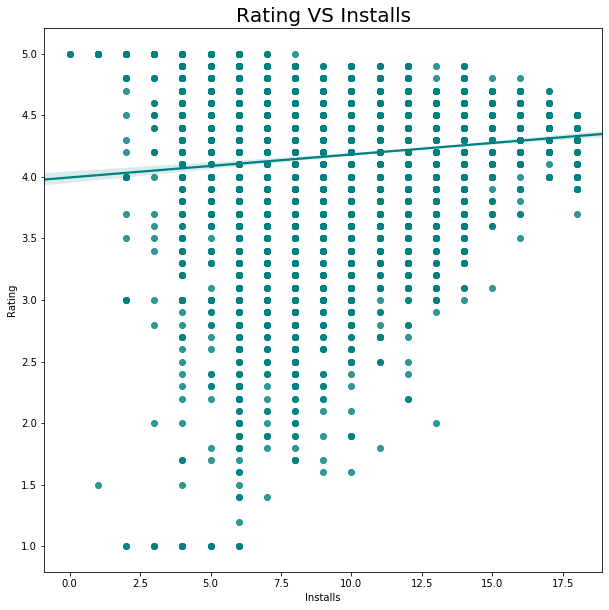

In [125]:
plt.figure(figsize=(10,10))
sns.regplot(x = "Installs", y = "Rating", color = 'teal', data = data)
plt.title('Rating VS Installs', size = 20)

### TYPE

In [126]:
data['Type'].unique()

array(['Free', 'Paid'], dtype=object)

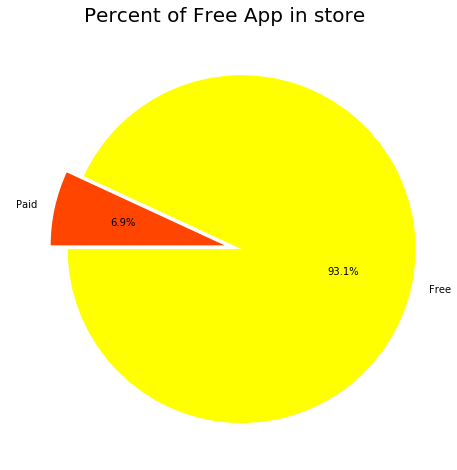

In [139]:
labels = data['Type'].value_counts(sort = True).index
sizes = data['Type'].value_counts(sort = True)

colors = ["Yellow","orangered"]
explode = (0.1,0)

rcParams['figure.figsize'] = 8,8
plt.pie(sizes, explode = explode, labels = labels, colors = colors,
       autopct = '%1.1f%%', shadow=False, startangle = 180,)

plt.title('Percent of Free App in store', size = 20)
plt.show()

### Price 

In [140]:
data['Price'].head()

0    0
1    0
2    0
3    0
4    0
Name: Price, dtype: object

In [141]:
data.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [142]:
data['Price'].value_counts().head(30)

0          8715
$2.99       114
$0.99       106
$4.99        70
$1.99        59
$3.99        58
$1.49        30
$2.49        21
$5.99        18
$9.99        16
$6.99        13
$399.99      11
$14.99       10
$4.49         9
$7.99         7
$3.49         7
$29.99        6
$24.99        5
$11.99        5
$12.99        5
$19.99        5
$8.99         4
$5.49         3
$16.99        3
$10.00        3
$10.99        2
$9.00         2
$7.49         2
$79.99        2
$1.70         2
Name: Price, dtype: int64

In [143]:
data.Price = data.Price.apply(lambda x: x.replace('$',''))
data['Price'] = data['Price'].apply(lambda x:float(x))

In [144]:
data['Price'].describe()

count    9360.000000
mean        0.961279
std        15.821640
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [145]:
data[data['Price'] == 400]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,8,Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up


Text(0.5, 1.0, 'Scatter plot Rating VS Price')

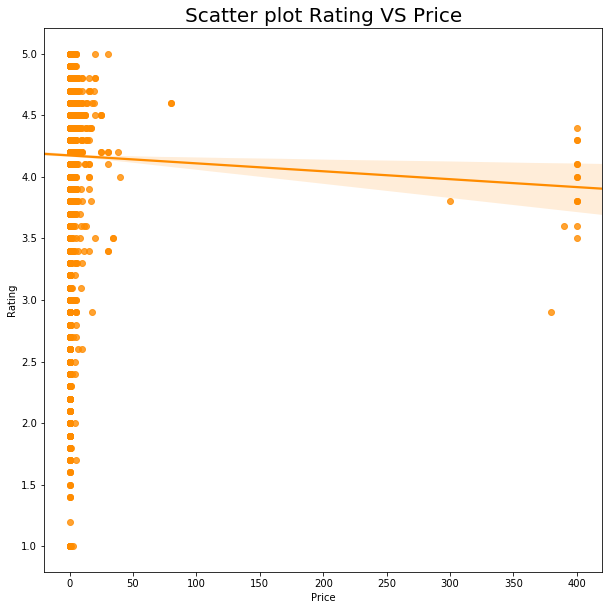

In [146]:
plt.figure(figsize = (10,10))
sns.regplot(x="Price", y = "Rating", color = 'darkorange', data=data[data['Reviews']<1000000]);

plt.title('Scatter plot Rating VS Price', size = 20)

In [152]:
data.loc[ data['Price'] == 0, 'Priceband'] = '0 Free'
data.loc[(data['Price'] > 0) & (data['Price'] <= 0.99),'PriceBand'] = '1 Cheap'
data.loc[(data['Price'] > 0.99) & (data['Price'] <= 2.99),'PriceBand'] = '2 not Cheap'
data.loc[(data['Price'] > 2.99) & (data['Price'] <= 4.99),'PriceBand'] = '3 normal'
data.loc[(data['Price'] > 4.99) & (data['Price'] <= 14.99),'PriceBand'] = '4 expensive'
data.loc[(data['Price'] > 14.99) & (data['Price'] <= 29.99),'PriceBand'] = '5 too expensive'
data.loc[(data['Price'] > 29.99),'PriceBand'] = '6 F**king expensive'

In [151]:
data[['PriceBand','Rating']].groupby(['PriceBand'], as_index = False).mean()

,PriceBand,Rating
0,1 Cheap,4.300943
1,2 not Cheap,4.292975
2,3 normal,4.250318
3,4 expensive,4.269149
4,5 too expensive,4.252000
5,6 F**king expensive,3.923810


Text(0.5, 1, 'Boxen plot Rating vs PriceBand')

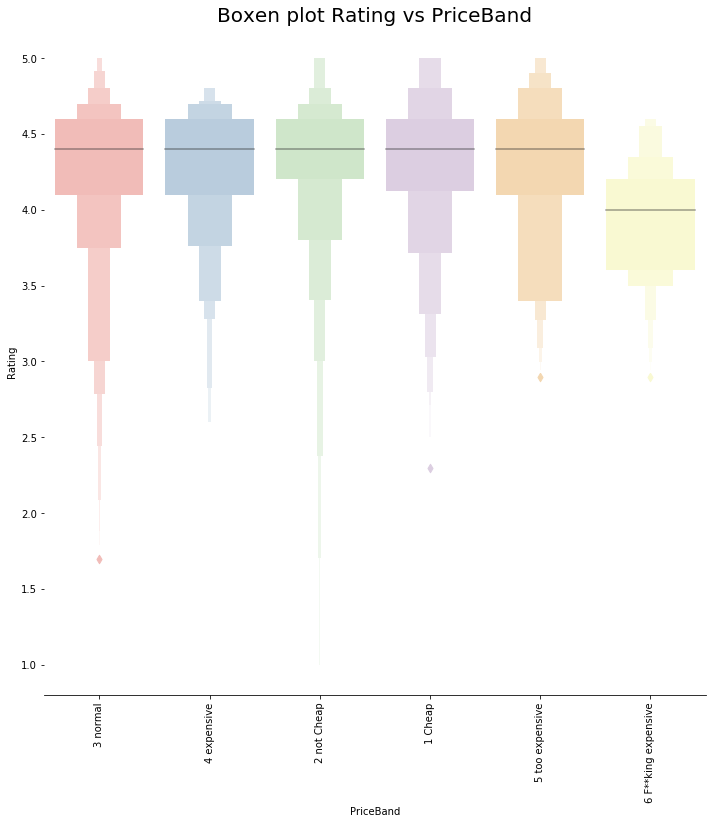

In [153]:
g = sns.catplot(x="PriceBand", y="Rating", data = data, kind = "boxen", height = 10, palette = "Pastel1")
g.despine(left = True)
g.set_xticklabels(rotation=90)
g=g.set_ylabels("Rating")
plt.title('Boxen plot Rating vs PriceBand', size = 20)

In [154]:
import random

def generate_color():
    color = '#{:02x}{:02x}{:02x}'.format(*map(lambda x: random.randint(0, 255), range(3)))
    return color

In [155]:
flatui = []
for i in range(0,len(data['Category'].unique()),1):
    flatui.append(generate_color())

Text(0.5, 1, 'Cateogory in each Priceband vs Rating')

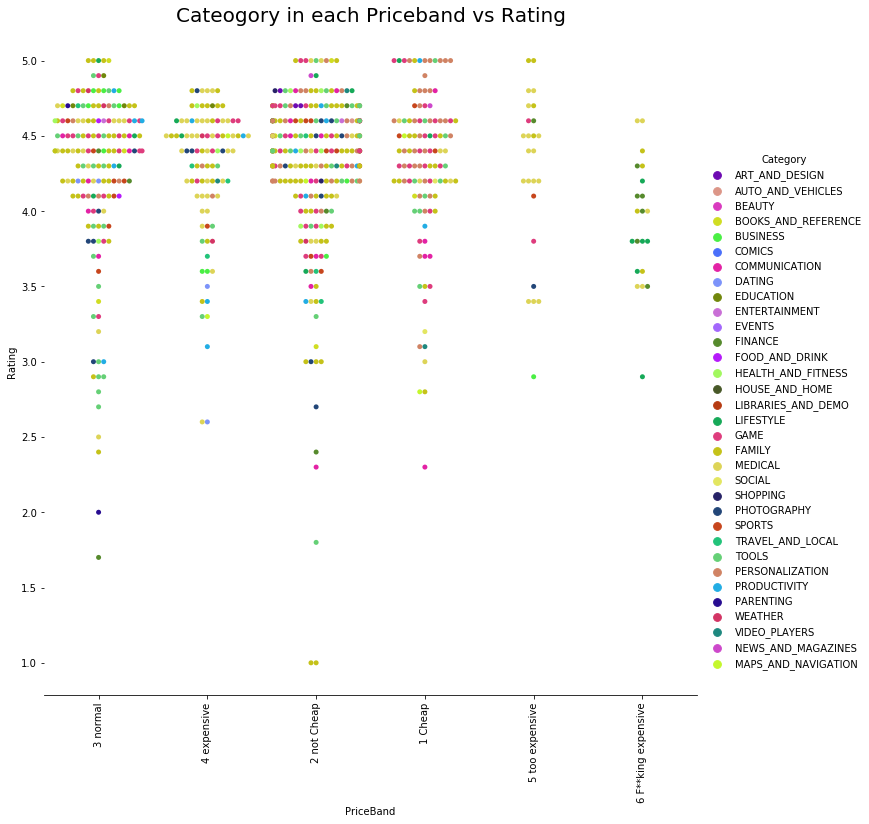

In [156]:
g = sns.catplot(x="PriceBand",y="Rating", hue ="Category",kind ="swarm",
               data = data, palette = flatui,size = 10)
g.despine(left = True)
g.set_xticklabels(rotation=90)
plt.title('Cateogory in each Priceband vs Rating', size =20)

### Content Rating

In [157]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [160]:
#sebelum price harusnya
data['Free'] = data['Type'].map(lambda s :1 if s =='Free' else 0)
data.drop(['Type'],axis =1, inplace=True)

Text(0.5, 1, 'Box plot Rating VS Content Rating')

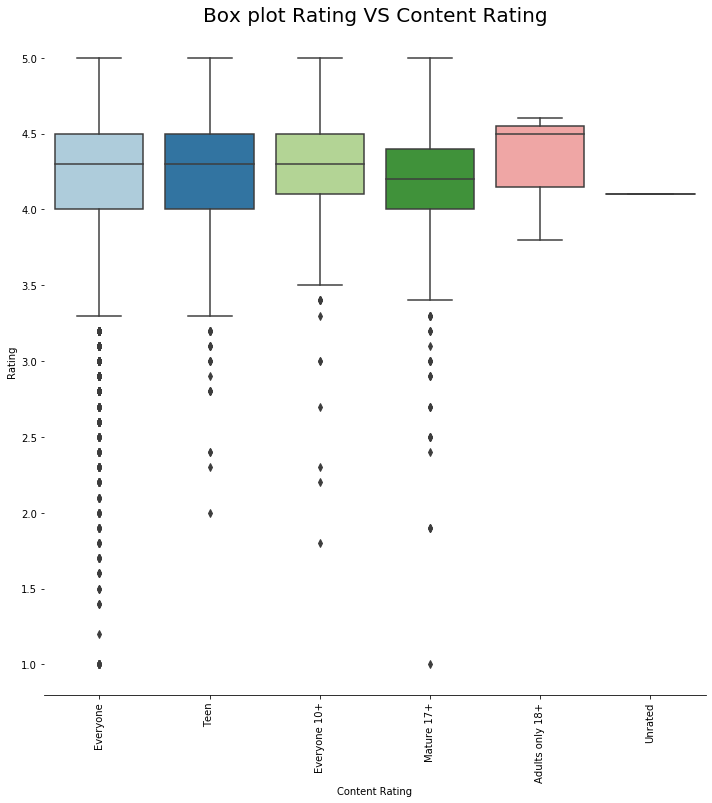

In [162]:
g = sns.catplot(x="Content Rating", y = "Rating", data = data, kind = "box", height = 10, palette = "Paired")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Box plot Rating VS Content Rating', size = 20)

In [163]:
data[data['Content Rating']=='Unrated']

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Priceband,PriceBand,Free
8266,DC Universe Online Map,TOOLS,4.1,1186,6400000.0,9,0.0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up,0 Free,NaN,1


In [164]:
data = data[data['Content Rating'] != 'Unrated']

In [165]:
data = pd.get_dummies(data, columns = ["Content Rating"])

### Genres

In [166]:
print(len(data['Genres'].unique()), "Genres")
print("\n", data['Genres'].unique())

115 Genres

 ['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business' 'Comics'
 'Comics;Creativity' 'Communication' 'Dating' 'Education;Education'
 'Education' 'Education;Creativity' 'Education;Music & Video'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment' 'Entertainment;Music & Video'
 'Entertainment;Brain Games' 'Entertainment;Creativity' 'Events' 'Finance'
 'Food & Drink' 'Health & Fitness' 'House & Home' 'Libraries & Demo'
 'Lifestyle' 'Lifestyle;Pretend Play' 'Adventure;Action & Adventure'
 'Arcade' 'Casual' 'Card' 'Casual;Pretend Play' 'Action' 'Strategy'
 'Puzzle' 'Sports' 'Music' 'Word' 'Racing' 'Casual;Creativity'
 'Casual;Action & Adventure' 'Simulation' 'Adventure' 'Board' 'Trivia'
 'Role Playing' 'Simulation;Education' 'Action;Action & Adventure'
 'Casual;Brain Games' 'Simulation;Action & Adventure'
 'Educational;Creativity' 'Puzzle;Brain Games' 'Educati

In [168]:
data.Genres.value_counts().head()
data.Genres.value_counts().tail(10)

Tools;Education                      1
Puzzle;Education                     1
Role Playing;Brain Games             1
Parenting;Brain Games                1
Travel & Local;Action & Adventure    1
Communication;Creativity             1
Strategy;Education                   1
Strategy;Creativity                  1
Entertainment;Education              1
Health & Fitness;Education           1
Name: Genres, dtype: int64

In [169]:
data['Genres'] = data['Genres'].str.split(';').str[0]

In [170]:
print(len(data['Genres'].unique()), "Genres")
print("\n", data['Genres'].unique())

48 Genres

 ['Art & Design' 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business'
 'Comics' 'Communication' 'Dating' 'Education' 'Entertainment' 'Events'
 'Finance' 'Food & Drink' 'Health & Fitness' 'House & Home'
 'Libraries & Demo' 'Lifestyle' 'Adventure' 'Arcade' 'Casual' 'Card'
 'Action' 'Strategy' 'Puzzle' 'Sports' 'Music' 'Word' 'Racing'
 'Simulation' 'Board' 'Trivia' 'Role Playing' 'Educational'
 'Music & Audio' 'Video Players & Editors' 'Medical' 'Social' 'Shopping'
 'Photography' 'Travel & Local' 'Tools' 'Personalization' 'Productivity'
 'Parenting' 'Weather' 'News & Magazines' 'Maps & Navigation' 'Casino']


In [171]:
data.Genres.value_counts().tail(10)

Comics           58
Parenting        50
Card             48
Events           45
Beauty           42
Casino           37
Word             28
Trivia           28
Music            24
Music & Audio     1
Name: Genres, dtype: int64

In [172]:
data['Genres'].replace('Music & Audio','Music', inplace=True)

In [173]:
data[['Genres','Rating']].groupby(['Genres'], as_index=False).mean().describe()

,Rating
count,47.000000
mean,4.210662
std,0.104405
min,3.970769
25%,4.132039
50%,4.198246
75%,4.282529
max,4.435556


In [174]:
data[['Genres','Rating']].groupby(['Genres'], as_index = False).mean().sort_values('Rating').head(1)

,Genres,Rating
14,Dating,3.970769


In [175]:
data[['Genres','Rating']].groupby(['Genres'], as_index=False).mean().sort_values('Rating').tail(1)

,Genres,Rating
18,Events,4.435556


Text(0.5, 1, 'Boxenplot of Rating VS Genres')

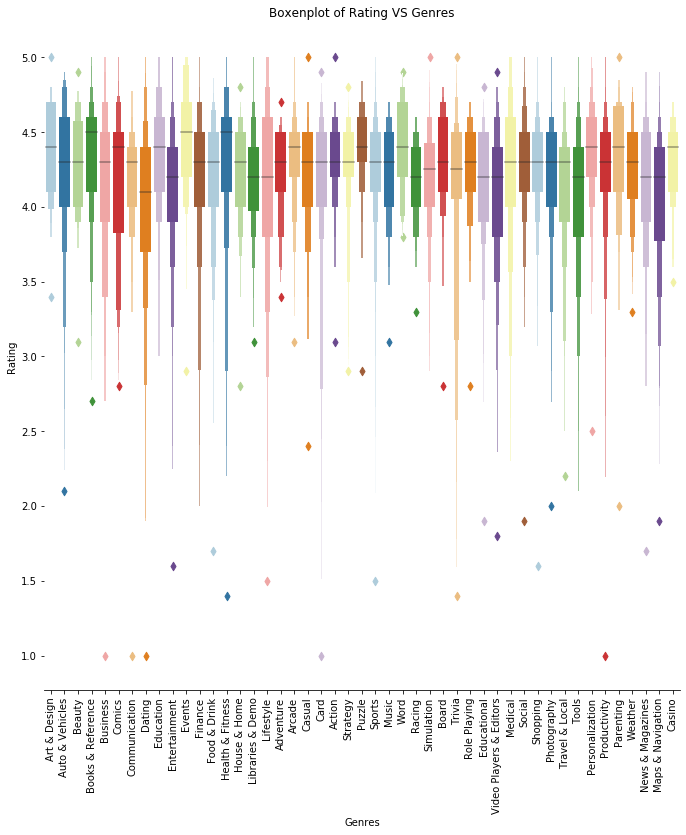

In [177]:
g = sns.catplot(x="Genres", y="Rating", data =data, kind="boxen", height = 10, palette = "Paired")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Boxenplot of Rating VS Genres')

### Last Updated

In [178]:
data['Last Updated'].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [179]:
data['new'] = pd.to_datetime(data['Last Updated'])
data['new'].describe()

count                    9359
unique                   1298
top       2018-08-03 00:00:00
freq                      319
first     2010-05-21 00:00:00
last      2018-08-08 00:00:00
Name: new, dtype: object

In [180]:
data['new'].max()

Timestamp('2018-08-08 00:00:00')

In [183]:
data['new'][0] - data['new'].max()

Timedelta('-213 days +00:00:00')

In [185]:
data['lastupdate']=(data['new'] - data['new'].max()).dt.days
data['lastupdate'].head()

0   -213
1   -205
2     -7
3    -61
4    -49
Name: lastupdate, dtype: int64

Text(0.5, 1.0, 'Rating VS Last Update (days ago)')

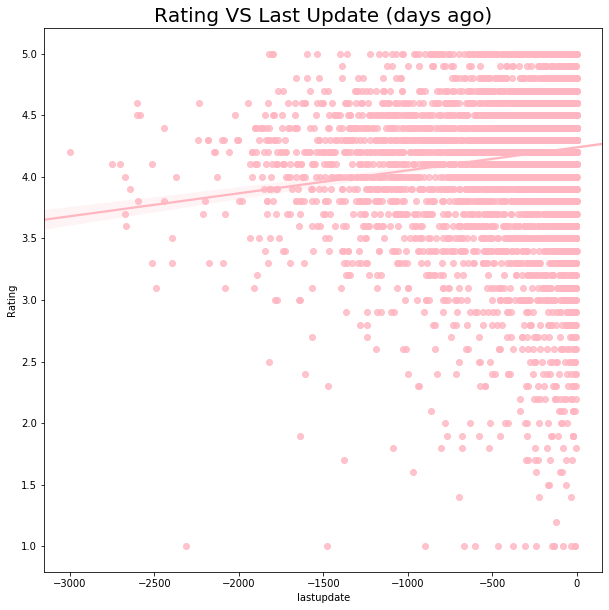

In [186]:
plt.figure(figsize = (10,10))
sns.regplot(x="lastupdate", y="Rating", color = 'lightpink', data=data);
plt.title('Rating VS Last Update (days ago)', size = 20)

### Istirahat dulu bosque...

12:50 AM
</br> 10/07/2019